# Setups

In [1]:
# @title Initialize Session
from google.colab import drive
drive.mount("/content/drive")

%env DRIVE_SRC=/content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/src
%cd /content
# !rm -r -f ./src; mkdir ./src
# !cp -r $DRIVE_SRC/* ./src/

Mounted at /content/drive
env: DRIVE_SRC=/content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/src
/content
rm: cannot remove './src': No such file or directory


In [9]:
# @title Copy current files back to drive
# !cp -r ./src/* $DRIVE_SRC

In [1]:
# from src.data.download import download as download_data
# ds_path = download_data("cricket-semantic", download_location="./data")
ds_path = "/content/data/cricket-semantic-segmentation"

In [2]:
from src.data.analyze import img_sizes as analyze_img_sizes
imgs_path = f"{ds_path}/images"
analyze_img_sizes(imgs_path, "cricket-semantic")

[{'size': '(1920, 1080)', 'count': 298}]

In [3]:
from src.data.analyze import get_img_list
img_nm_lst = sorted(get_img_list(imgs_path, "cricket-semantic"))
img_path_lst = list(map(lambda f_name: f"{imgs_path}/{f_name}", img_nm_lst))

In [4]:
from src.data.analyze import ImageMemoryObj
img_grid_disp_n = 3
m = ImageMemoryObj(imgs_path, img_nm_lst, img_grid_disp_n)

In [6]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt

p_btn = widgets.Button(description='Previous', disabled=True)
n_btn = widgets.Button(description='Next')
out = widgets.Output()

def off_btns(*btns):
  for btn in btns:
    btn.disabled = True
def on_btns(*btns):
  for btn in btns:
    btn.disabled = False

def on_click_next(_):
  off_btns(p_btn, n_btn)
  m.next()
  with out:
    clear_output()
    m.show()
  m.load_next()
  if m.next_end >= len(m.img_nm_lst):
    on_btns(p_btn)
  else:
    on_btns(p_btn, n_btn)
n_btn.on_click(on_click_next)
def on_click_prev(_):
  off_btns(p_btn, n_btn)
  m.prev()
  with out:
    clear_output()
    m.show()
  m.load_prev()
  if m.prev_start <= 0:
    on_btns(n_btn)
  else:
    on_btns(p_btn, n_btn)
p_btn.on_click(on_click_prev)

with out:
  m.show()

btn_container = widgets.HBox([p_btn, n_btn])
widgets.VBox([out, btn_container])

# Detection Data

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys, os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

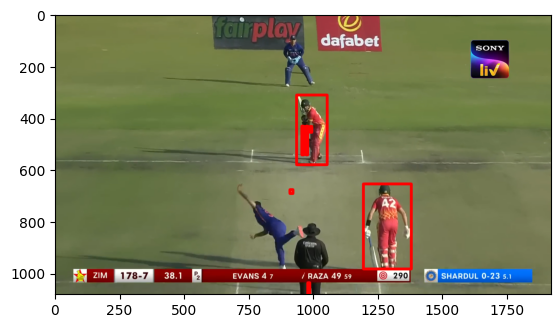

In [2]:
from src.data.visualize import drawRects

img = cv.imread("../data/Cricket-Semantic-Segmentation/images/2022-08-24 (284).png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
content = ""
with open("../data/Cricket-Semantic-Segmentation/annotations/2022-08-24 (284).txt") as handler:
    content = handler.read()

drawn_img = drawRects(img, content)
plt.imshow(drawn_img)
plt.imshow()